#                                      **TITANIC PROJECT**

This is a walktrough of the steps i took solving the Titanic data set. The objective of this project is to predict correctly who survived and did not survive the wreckage. In this notebook, 82.26% is the best score on the training set using Logistic regression while 0.77 ia the public score.

**Below is an overview of the steps taken** 
1. Data exploration
2. Data cleaning
3. Feature engineering
4. Data preprocessing
5. Model development and comparisms
6. Results
7. Submission

The cell below imports the numpy and pandas library along with our datasets.

In [297]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Data exploration**

Lets read our training data and have a look at the first 10 rows. The aim here is to have a proper idea of the type data contained in each column

In [298]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Lets have a look at the mean, maximum and minimum values of columns with numerical data.

In [299]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the cells above there are some missing/null values in the 'Cabin','Age' and 'EMbarked' column (from their count), lets have a look at the number of null values in all columns. lets also have a look at the shape of our training set.

In [300]:
l=df.isnull().sum()
print(l , df.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 (891, 12)


We can now see the number of missing values in the 'Age', 'Cabin' and 'Embarked' column, later on we would do some imputations to handle them.

The cell below is used to check the degree of correlation between columns., note that each column is expected to be perfectly corrolated with itself and the only other columns with the most correlation are the 'SipSp' (sibling to parent ratio), and 'Parch' (parent to children ratio) columns.

<AxesSubplot:>

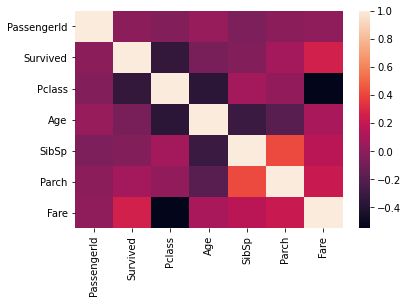

In [301]:
import seaborn as sns
sns.heatmap(df.corr())

Relationship between variables refers to the relationsship between the dependent variable ('Survived' column) and the independent variable (other columns).
let's first have a look at the survival rate using seaborne.


survival rate using seabornes.

<AxesSubplot:xlabel='Survived', ylabel='count'>

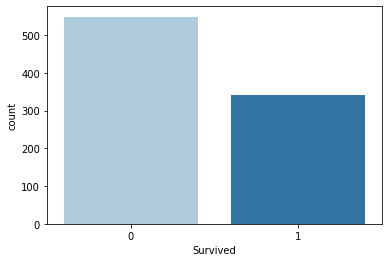

In [302]:
sns.countplot(data=df, x='Survived')

From the plot above it's clear that more poeple died than survived, over 500 passengers died while less than 400 survived. lets have a look at how the 
independent variables (sex, age, embarhed, fare, Pclass etc) are related to the survival rate. We would be starting with sex.

<AxesSubplot:xlabel='Sex', ylabel='count'>

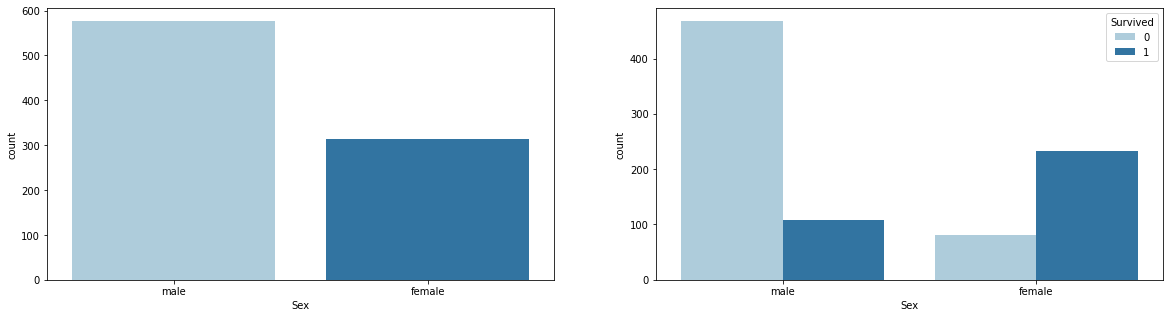

In [303]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='Sex')
sns.countplot(ax=axes[1],data=df,x='Sex',hue='Survived')

The plot above shows the survival rate with respect to sex. The plot on the left shows the total number of males and females that boarded the ship while the one on the right shows the amount of males and females that survived or not. Less than 110 (20 percent) of the males on the ship survived while over 200 (70 percent) of the females survived. Hence a female has a higher chance of survival (4 times more) than a male. we can go ahead to check the survival rate with respect to the point of embarkment.


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

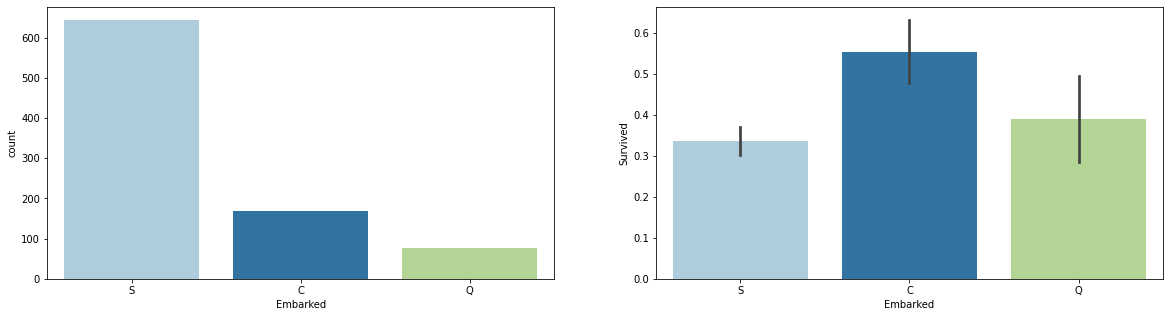

In [304]:
sns.set_palette('Paired')
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='Embarked')
sns.barplot(ax=axes[1],data=df, x= 'Embarked', y='Survived')


The plot on the left shows the total number of passengers that embarked from fifferent points, while 'nan' stands for those passengers whose point of embarkment was not recorded, while that on the right represents the percentage of passengers that survived from each point of embarkment.
From the barplot it is evident that passengers that embarked at 'C' had a higher chance of survival, about 55% of them survived while less than 40% of the passengers that embarked at 'S' and 'C' survived with 'S' having the lowest survival rate (note that very few passengers had their point of embarkment not recorded and they all survived). Below is a look at the survival rate of men and women with respect to where they embarked.



<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

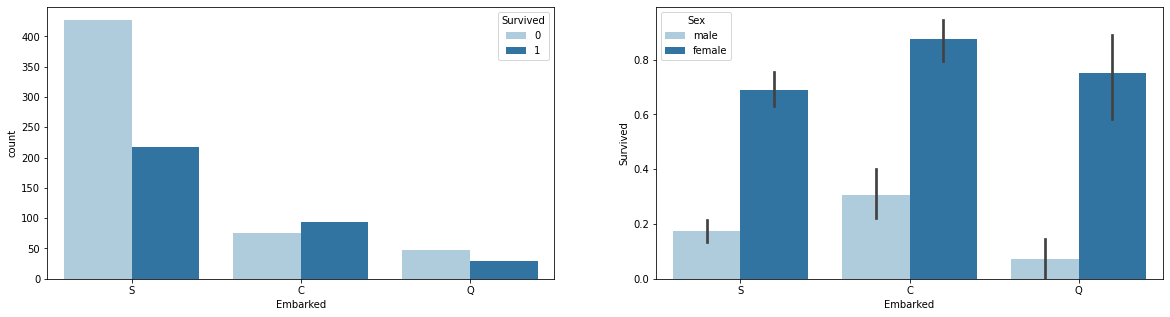

In [305]:
sns.set_palette('Paired')
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='Embarked', hue='Survived')
sns.barplot(ax=axes[1],data=df, x= 'Embarked', y='Survived', hue='Sex')

The plot above shows that more females that embarked from each category survived. Let's go ahead and check survival rate with respectc to a passengers class (Pclass). 




<AxesSubplot:xlabel='Sex', ylabel='Survived'>

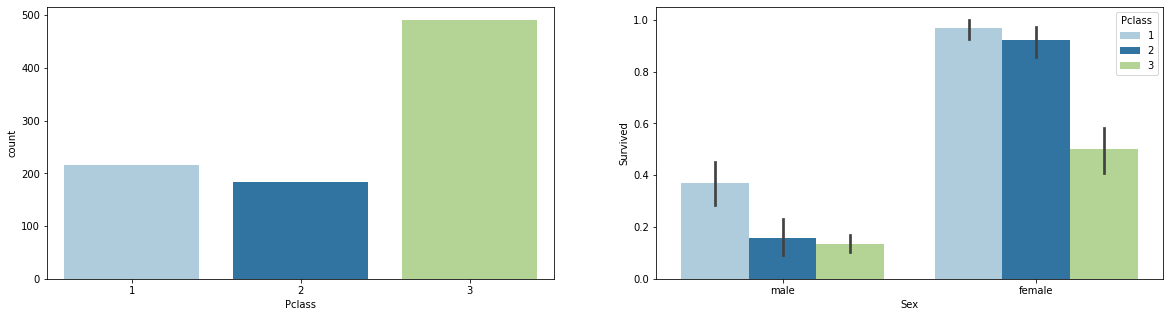

In [306]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='Pclass')
sns.barplot(ax=axes[1], data=df,x='Sex',y='Survived', hue="Pclass")

From the plots it is evident that more passengers were in the passenger class '3' while the least amount of passengers were in class '2'. Conversly male and female passengers in passenger class '3' had the lowest chance of survival while those in class '1' had the highest chance of survival. UP next we would be checking the survival rate by age.


Knowing we have iver 800 passengers, below is the age disribution of our passengers. Majority ofthe passengers fall within the ages of 15 to40 years.



<AxesSubplot:xlabel='Age', ylabel='Count'>

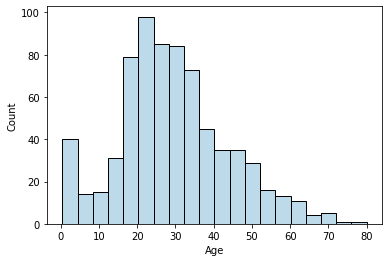

In [307]:
sns.histplot(data=df,x='Age')

Let's have a look at how many unique (different) ages are distributed amongst the passengers. 



In [308]:
df.Age.nunique()

88

If we are to plot the relationship between age and survival, we would have a cluttered graph due to a large number of different values for the fares. Hence we would be spltting the fares into fare groups in a new column. Now we create a column where we group the ages in groups of 10 and sort them for ease of plotting a clear graph showing the survival rate with respect to age and sex.




<AxesSubplot:xlabel='age_group', ylabel='Survived'>

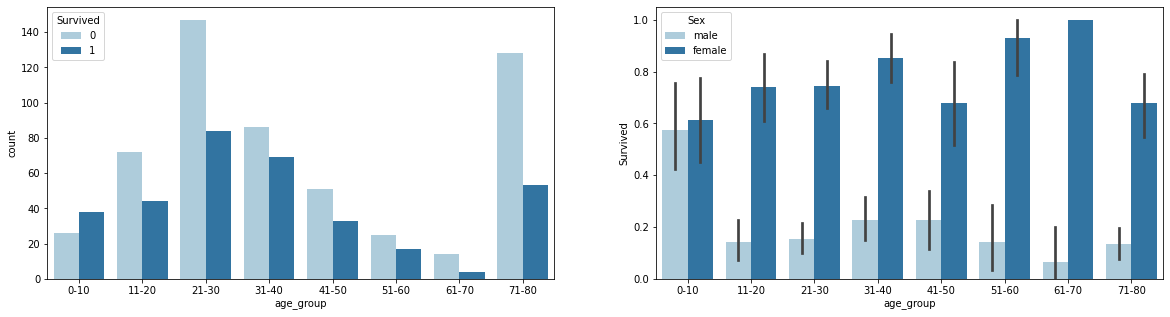

In [309]:
Age_group=[]
for c in df.Age:
    if c<11:
        Age_group.append("0-10")
    elif 10<c<21:
        Age_group.append("11-20")
    elif 20<c<31:
        Age_group.append("21-30")
    elif 30<c<41:
        Age_group.append("31-40")
    elif 40<c<51:
        Age_group.append("41-50")
    elif 50<c<61:
        Age_group.append("51-60")
    elif 60<c<71:
        Age_group.append("61-70")
    else:
        Age_group.append("71-80")      
 
df['age_group']=Age_group


fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.set_palette('Paired')
df1=df.sort_values('Age', ascending=True)
sns.countplot(ax=axes[0], data=df1,x='age_group', hue="Survived")
sns.barplot(ax=axes[1], x='age_group', hue='Sex', data=df1, y='Survived')

From the graph on the left we can see that most of the passengers that survived were within the age group of 21-30 years while those within 61-70 were the most few that survived. From the graph on the right, males with the ages of 0-10 years had almost the same chance of survival as the females in the same age group and that is the age group among males with the highest chance of survival. The graph below gives us a clearer view of the age group with the highest chance of survival within males and females.



<AxesSubplot:xlabel='Sex', ylabel='Survived'>

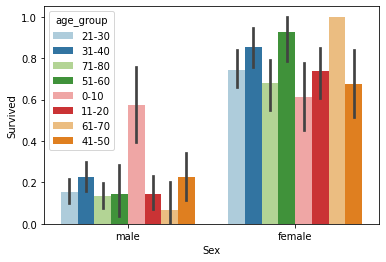

In [310]:
sns.barplot(data=df, x='Sex',hue='age_group',  y='Survived')

The graph below shows the rate of survival with respect to SibSp (number of siblings/parents), passengers with 0 and 1 'SibSP' have the highest chance of survival while those with 6 and 8 have the lowest chance of survival (0 chance of survival).

<AxesSubplot:xlabel='SibSp', ylabel='count'>

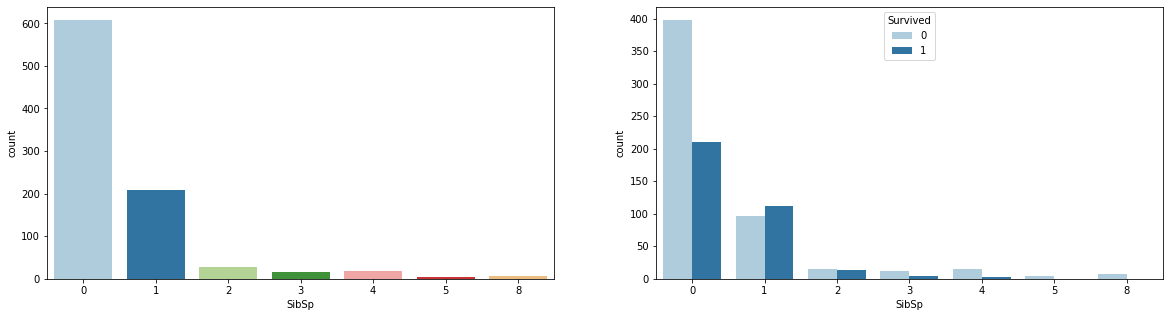

In [311]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='SibSp')
sns.countplot(data=df, x='SibSp', hue='Survived')#, dodge=False)

<AxesSubplot:xlabel='Parch', ylabel='count'>

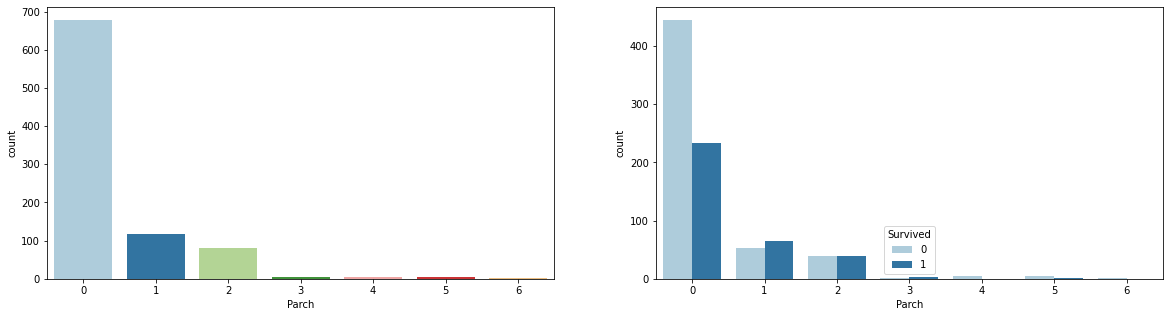

In [312]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.countplot(ax=axes[0], data=df,x='Parch')
sns.countplot(data=df, x='Parch', hue='Survived')

Next is the 'Cabin', let's have a look at how many cabins we have below.

In [313]:
df.Cabin.nunique()

147

Making a countplot for the cabins is not the best ideas as seen below. The graph is not interpretable due to the large number of cabins, later on we would be doing some featyre engineering to get a better idea of the relationship between 'Cabin' and 'Survival'. 

<AxesSubplot:xlabel='Cabin', ylabel='count'>

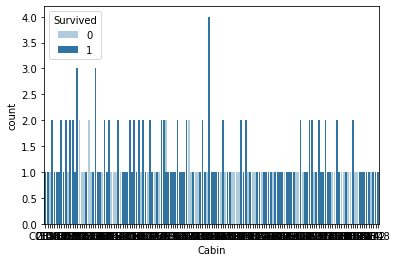

In [314]:
plt.figsize=(50,10)
sns.countplot(data=df, x='Cabin', hue='Survived', dodge=False)


If we are to plot the relationship between fares and survival, we qould have a similar graph to the one above due to a large number of different values for the fares. Hence we would be spltting the fares into fare groups in a new column.

In [315]:
fare_group=[]
for c in df.Fare:
    if c<11:
        fare_group.append("0-10")
    elif 10<c<21:
        fare_group.append("11-20")
    elif 20<c<31:
        fare_group.append("21-30")
    elif 30<c<41:
        fare_group.append("31-40")
    elif 40<c<51:
        fare_group.append("41-50")
    elif 50<c<101:
        fare_group.append("50-100")
    elif 100<c<201:
        fare_group.append("101-200")
    elif 200<c<301:
        fare_group.append("201-300")
    elif 300<c<401:
        fare_group.append("301-400")
    elif 400<c<501:
        fare_group.append("401-500")
    else:
        fare_group.append("501-550")      
 
df['Fare_group']=fare_group
df['Fare_group'].value_counts()

0-10       364
11-20      160
21-30      142
50-100     106
31-40       50
101-200     33
201-300     17
41-50       16
501-550      3
Name: Fare_group, dtype: int64

The output cell above shows the count for each fare group, now we can go ahead and sort the fare_group column then plot graphs using the fare_group colums

<AxesSubplot:xlabel='Fare_group', ylabel='count'>

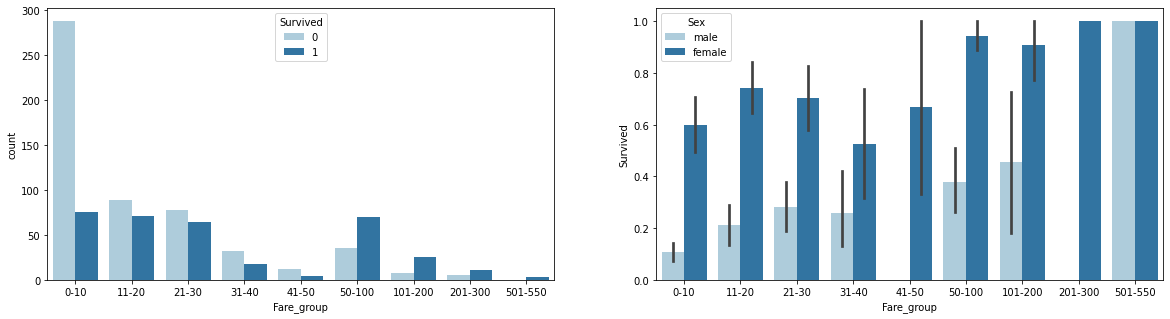

In [316]:
df2=df.sort_values('Fare', ascending=True)
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(ax=axes[1], x='Fare_group', hue='Sex', data=df2, y='Survived')
sns.countplot(ax=axes[0],data=df2, x='Fare_group', hue='Survived')


From the graphs above, there were more passengers who paid between 0$ to 10$ and females had a higher survival rate in each fare group apart from those that paid 501$ to 550$ where everyone survived.

# DATA CLEANING

Let's have a look at where we have null values.

In [317]:
df.drop(['age_group','Fare_group'], axis=1,inplace =True)
d=df.isnull().sum()
d

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have a large number of null values, so dropping them would not be a smart move as than would mean loosing over half of our data. Hence we would be doing some imputation. However let's first have a good look at our test set.

In [318]:
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head

<bound method NDFrame.head of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0 

TO make our job easy when cleaning, preprocessing and carrying out imputations, we would be joining our test and train sets together so as the carry out the earlier mentioned steps once without the need for repeating any operation for both the training and test set.

In [319]:
all_data=pd.concat([df,test_data], ignore_index=True)  # we are setting the ignore_index to true so our combined data set would be indexed continously (indexed from 0_1309)
all_data.head

<bound method NDFrame.head of       PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                  

now that we have combined our data set, let's have a look at a summary of each column so we can identify columns with missing values.

In [320]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


The 'Embarked' column is missing 2 calumns (has 1307 out of 1309 values), while the 'Cabin' columns is missing over 1000 values and the 'Age' column is missing just over 200 values. Lets start our imputations on the Embarked column.

In [321]:
all_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

The cell above shows us all unique values from the Embarked column, we can see that the column contains 'nan' values. Let's write a code to replace the nan values with the values with maximum occurance. The cell below checks the count of the other values in the column.

In [322]:
all_data.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1.0       1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1.0       1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1.0       1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1.0       1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0.0       1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

'S' occurs more than any other value, therefore we would be replacing the 'nan' values with 'S'. We first have to get the locationo of the 'nan' values, that is what's done in the cell below.

In [323]:
for i,j in enumerate(all_data.Embarked):  # gettin a value pair of each value (i) and its index location (j)
    if type(j)!=str:
        print(i,j)

61 nan
829 nan


In [324]:
all_data.iloc[[61,829]]['Embarked']

61     NaN
829    NaN
Name: Embarked, dtype: object

Now that we have the index of the 'nan' values, we can input the value with the highest frequency, which is 'S' and we check if our imputation was a success

In [325]:
all_data.Embarked[61]='S'
all_data.Embarked[829]='S'
all_data.Embarked.value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [326]:
for i,j in enumerate(all_data.Fare):  # gettin a value pair of each value (i) and its index location (j)
    if np.isnan(j):
         all_data.Fare[i]=test_data.Fare.mean()
print(all_data.Fare[i])

22.3583


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


To fill the values in the 'Age' column we would be taking a different approach, we would group the passengers by sex, Pclass and Embarked before getting their mean age for that group, this should give us a better result than just generalising the mean age for all the passengers. We would be using the group_by method to actualise this.

In [327]:
df1=all_data.groupby(['Sex','Pclass','Embarked']).mean()
df1


PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass Embarked                                                         
female 1      C          697.704225  0.976744  38.107692  0.436620  0.380282   
              Q          858.000000  1.000000  35.000000  1.000000  0.000000   
              S          676.859155  0.960000  36.045455  0.661972  0.577465   
       2      C          702.636364  1.000000  19.363636  0.818182  0.636364   
              Q          313.500000  1.000000  30.000000  0.000000  0.000000   
              S          630.709677  0.910448  28.455165  0.473118  0.666667   
       3      C          617.516129  0.652174  16.818182  0.548387  0.774194   
              Q          667.125000  0.727273  24.333333  0.178571  0.142857   
              S          614.193798  0.375000  22.854771  1.116279  0.976744   
male   1      C          703.742857  0.404762  40.047619  0.357143  0.357143   
              Q          246.000000  0.000000  44.000000  2.000000  0.000000   
              S          633.305556  0.354430  41.705977  0.314815  0.231481   
       2      C          710.764706  0.200000  27.269231  0.294118  0.294118   
              Q          898.000000  0.000000  53.750000  0.000000  0.000000   
              S          687.510067  0.154639  30.491702  0.342282  0.187919   
       3      C          696.042857  0.232558  24.129474  0.300000  0.171429   
              Q          663.140351  0.076923  26.738095  0.491228  0.105263   
              S          633.609290  0.128302  26.146241  0.500000  0.295082   

                              Fare  
Sex    Pclass Embarked              
female 1      C         118.895949  
              Q          90.000000  
              S         100.475648  
       2      C          27.003791  
              Q          12.350000  
              S          23.023118  
       3      C          13.834545  
              Q           9.791968  
              S          18.083851  
male   1      C          94.622560  
              Q          90.000000  
              S          53.670756  
       2      C          20.904406  
              Q          11.489160  
              S          20.073322  
       3      C           9.775901  
              Q          10.979167  
              S          13.207401

The next thing is the replace the null (nan) values with the mean age for the respective groups, the cell below contains a loop that scans through all the rows in the 'Age' column to check the group they belong to (i.e is the passager a male, then what is his Pclass and finally where did he embark from before imputing the mean age for passengers from that group) and then impute the mean age for that group. 

In [328]:
for j,i in enumerate(all_data.Age): # gettin a value pair of each value (i) and its index location (j)
    if np.isnan(i):   # checking if the value is a null (nan) value
        if all_data.Sex[j]=='female':   #check the sex using the index (j) locaion
            if all_data.Pclass[j] == 1:  # check the Pclass using the index (j) locaion
                if all_data.Embarked[j]=='C':  # check where the passenger embarked from using the index (j) locaion
                    all_data.Age[j]=38  # impute mean age for that group using the index (j) locaion
                if all_data.Embarked[j]=='Q':
                    all_data.Age[j]=35
                if all_data.Embarked[j]=='S':
                    all_data.Age[j]=35
            if all_data.Pclass[j] == 2:
                if all_data.Embarked[j]=='C':
                    all_data.Age[j]=23
                if all_data.Embarked[j]=='Q':
                    all_data.Age[j]=30
                if all_data.Embarked[j]=='S':
                    all_data.Age[j]=28
            if all_data.Pclass[j] == 3:
                if all_data.Embarked[j]=='C':
                    all_data.Age[j]=15
                if all_data.Embarked[j]=='Q':
                    all_data.Age[j]=22
                if all_data.Embarked[j]=='S':
                    all_data.Age[j]=22
        if all_data.Sex[j]=='male':
            if all_data.Pclass[j] == 1:
                if all_data.Embarked[j]=='C':
                    all_data.Age[j]=39
                if all_data.Embarked[j]=='Q':
                    all_data.Age[j]=44
                if all_data.Embarked[j]=='S':
                    all_data.Age[j]=42
            if all_data.Pclass[j] == 2:
                if all_data.Embarked[j]=='C':
                    all_data.Age[j]=29
                if all_data.Embarked[j]=='Q':
                    all_data.Age[j]=59
                if all_data.Embarked[j]=='S':
                    all_data.Age[j]=29
            if all_data.Pclass[j] == 3:
                if all_data.Embarked[j]=='C':
                    all_data.Age[j]=24.25
                if all_data.Embarked[j]=='Q':
                    all_data.Age[j]=25
                if all_data.Embarked[j]=='S':
                    all_data.Age[j]=25

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to b

Lets check if our imputation for the age column was sucessfull

In [329]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


From the above we have 1309 non null values, which is the total number of values in the column.

# **FEATURE ENGINEERING**

In this section we would be trying to develop some new features (columns) from the existing features (columns).THE AIM OF THIS IS TO DEVELOP HELPFULL FEATURES WHICH CAN IMPROVE OUR PREDICTIONS.

Starting with the 'Cabin' column where we have a lot of missing values, the cabin numbers are arranged in a string_integr pair, so we can take the first letter of each cabin number and use that as a cabin class/group, while the 'nan' values are taken as a seperate group thereby craating a new feature/column with no missing values.

In [330]:
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0]) # we use the 'str' method to strip the cabin number and take only the first character (the same applies for 'nan' values).
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  cabin_adv    1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


We can also extract the title of each passenger from their names and create a seperate column for that. Let have a look at how the names are arranged first.

In [331]:
all_data.Name.head

<bound method NDFrame.head of 0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object>

The names are in the format of Name/Tittle/Other Names. Hence we split the names at the 'comma' after the name at the first position and pick the tittle, then we split the tittle of the 'full stop' at its end and take the tittle alone as in the first line of the cell below.

In [332]:
all_data['tittle'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  cabin_adv    1309 non-null   object 
 13  tittle       1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Cheching for null values in our dataset we can see that there are no null values excpt in the 'Cabin' column, this is not a problem as we would be using our 'cabin_adv' column instead. we can also see the new columns we created (tittle, cabin_adv).


We would be doing something similar to our ticket colum as done to out cabin column. We would be taking only the first letter of our string_integer pair and using that to create a new feature/column as our ticket class.Lets first have a look at how the ticket are arranged

In [333]:
all_data.Ticket.head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [334]:
all_data['ticket_typ']= all_data.Ticket.apply(lambda x: x.split('/')[0]) #split the ticket at '/' and take the first value
all_data['ticket_typ']= all_data.Ticket.apply(lambda x: x.split(' ')[0]) #split the ticket(the output above) at ' ' (space) and take the first value
                
for i,t in enumerate(all_data.ticket_typ):  # this loop checks the length of the tickets and picks only the first character if the length  id more than 1. if the first character is a number it replaces it with 'x' otherwise it keeps it if is an alphabet
    if len(t)>1:
        all_data.ticket_typ[i]= t[0]
        if t[0].isdigit():
            all_data.ticket_typ[i]='x'
all_data.ticket_typ.value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


x    957
P     98
S     98
C     77
A     42
W     19
F     13
L      5
Name: ticket_typ, dtype: int64

Now lets split our data set (all_data) into training and test set so we can have a look it the distributions of our columns with imputations done and out new columns

In [335]:
train=all_data.iloc[0:891,:] # our training set had 891 rows, it occupies the forst 891 rows of our combined data set
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_adv,tittle,ticket_typ
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,Mr,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs,P
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,Miss,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs,x
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,Mr,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,n,Rev,x
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,Miss,x
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S,n,Miss,W
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,Mr,x


In [336]:
test=all_data.iloc[891:,:] # our test set had 418 rows, it occupies the last 418 rows of our combined data set
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_adv,tittle,ticket_typ
891,892,NaN,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q,n,Mr,x
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S,n,Mrs,x
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q,n,Mr,x
894,895,NaN,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S,n,Mr,x
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S,n,Mrs,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.00,0,0,A.5. 3236,8.0500,NaN,S,n,Mr,A
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.9000,C105,C,C,Dona,P
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,n,Mr,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.00,0,0,359309,8.0500,NaN,S,n,Mr,x


Checking the cabin_adv (cabin group/class) its evident that the 'n' class/group had more passengers. However the 'E', 'D' and 'F' classes/groups had the best survival rates even though they had far less passengers.

<AxesSubplot:xlabel='cabin_adv', ylabel='count'>

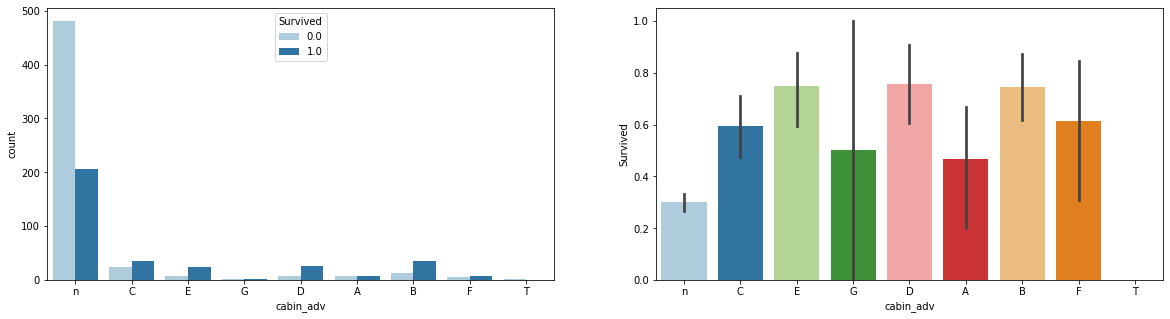

In [337]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(ax=axes[1], x='cabin_adv', data=train, y='Survived')
sns.countplot(ax=axes[0],data=train, x='cabin_adv', hue='Survived')#, dodge=False)



Below is a table showing survival rates by tittle, nan represents 0

In [338]:
pd.pivot_table(train,index='Survived',columns='tittle', values = 'Ticket', aggfunc='count')

tittle,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1.0,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


Below is a table showing survival rated by ticket type. Passengers with "P' tickets had the highest survival rates.

In [339]:
pd.pivot_table(train, index='Survived', columns='ticket_typ', values='Ticket', aggfunc='count')

ticket_typ,A,C,F,L,P,S,W,x
Survived,,,,,,,,
0.0,27,31,3,3,23,44,11,407
1.0,2,16,4,1,42,21,2,254


# **MODEL PREPROCESSING**

We would revert back to using our combined data set (all_data) for preprocessing, 'features' is the list of columns we would be usiing to train our model. Notive we have dropped the name, passenger_id,tittle, ticket and cabin column but are using tittle, ticket_typ, cabin_adv instead. This is because the dropped columns are of no use to our model since the are specific to each passenger and moreover we have extracted usefull information from them. 

In [340]:
features=[ 'Pclass','Sex','Age', 'SibSp',
       'Parch', 'Embarked','Fare', 'cabin_adv', 'tittle','ticket_typ',] # notice this does not contain our Survived column because we are going to save them seperatly

all_data_features=all_data[features]

now lets gett dummy variables for our categorical columns (columns with objects/strings and not numerical values)

In [341]:
all_data_dummies=pd.get_dummies(all_data_features)


In the cell below we would be extracting our training set from our combined data set just as done earlier, but saving them as X (independent variables) and y(dependent variables)

In [342]:
X=all_data_dummies.iloc[0:891, : ] # this is being extracted from our combined dataset with dummie variables
y=all_data.Survived.iloc[0:891]# this is being extracted from our combined dataset beefore dropping some columns. it's basically our survived column

let's have a look at y which is the survived column.

In [343]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

Time to import our models

In [344]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



We are going to split our train/train_data into training and test set so we can evaluate the performance of our models before making predictions and submiting them.

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [346]:
X.shape

(891, 45)

X contains 891 rows and 45 columns. In the cells below we would be training using different models with their default parameters.

We would be using cross validation score where our data set is shuffled 5 times (cv=5) to get 5 different instances of training and validation sets across our data.

# using KNN

In [347]:

model = KNN(n_neighbors=7)
cv = cross_val_score(model,X,y,cv=5)
print(cv)
print(cv.mean())

[0.65921788 0.70224719 0.7247191  0.7247191  0.74719101]
0.7116188563178709


# Using Linear regression

In [348]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
v=cross_val_score(LinearRegression(), X, y, cv=cv)
v.mean()

0.3700988176397616

# Using logistic regression

In [349]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X,y,cv=5)
print(cv)
print(cv.mean())

[0.82681564 0.8258427  0.79775281 0.80898876 0.85393258]
0.822666499278137


# Using Random forests

In [350]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X,y,cv=5)
print(cv)
print(cv.mean())

[0.83240223 0.80898876 0.84831461 0.75280899 0.8258427 ]
0.8136714581633294


# Using Naive Bayes

In [351]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb,X,y,cv=5)
print(cv)
print(cv.mean())

[0.70391061 0.73595506 0.75842697 0.75842697 0.78089888]
0.7475236959387358


# Using Support Vectors

In [352]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X,y,cv=5)
print(cv)
print(cv.mean())

[0.59776536 0.71348315 0.69101124 0.68539326 0.69101124]
0.6757328479065972


# Using Extreme gradient bost

In [353]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X,y,cv=5)
print(cv)
print(cv.mean())

[13:02:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier obje

[13:02:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:02:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.81005587 0.82022472 0.85955056 0.79213483 0.84269663]
0.8249325214989642


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


From The outputs of our models we can infer that Logistic regression gave us our best score of 0.8229 while linear regression gave our worse of 0.31. Thus we would be making a submission with logistic regression as our model.
Lets do some hyper parameterr tuning for the Logistic regression and gradient boosting model and see if our models can perform better.

In [354]:
'''xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')'''

"xgb = XGBClassifier(random_state = 1)\n\nparam_grid = {\n    'n_estimators': [450,500,550],\n    'colsample_bytree': [0.75,0.8,0.85],\n    'max_depth': [None],\n    'reg_alpha': [1],\n    'reg_lambda': [2, 5, 10],\n    'subsample': [0.55, 0.6, .65],\n    'learning_rate':[0.5],\n    'gamma':[.5,1,2],\n    'min_child_weight':[0.01],\n    'sampling_method': ['uniform']\n}\n\nclf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_xgb = clf_xgb.fit(X_train,y_train)\nclf_performance(best_clf_xgb,'XGB')"

In [355]:
xgb = XGBClassifier(colsample_bytree= 0.8, gamma= 0.5, learning_rate= 0.5, max_depth= None, min_child_weight= 0.01, n_estimators= 550, reg_alpha= 1, reg_lambda= 10, sampling_method='uniform', subsample= 0.65)
cv = cross_val_score(xgb,X,y,cv=5)
print(cv)
print(cv.mean())


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:02:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:02:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:02:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:02:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:02:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.84916201 0.83146067 0.87640449 0.83146067 0.86516854]
0.8507312786391312


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [356]:
# BElow are the codes for tuning the logistic regression model, i commented them because i ran them once and it took a little while, so i just copied the output into the next cell so i dont have to repeat the process.
'''def model_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
rf_model = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_rf_model = rf_model.fit(X_train,y_train)
model_performance(best_rf_model,'Random Forest')'''

"def model_performance(classifier, model_name):\n    print(model_name)\n    print('Best Score: ' + str(classifier.best_score_))\n    print('Best Parameters: ' + str(classifier.best_params_))\n\nparam_grid =  {'n_estimators': [400,450,500,550],\n               'criterion':['gini','entropy'],\n                                  'bootstrap': [True],\n                                  'max_depth': [15, 20, 25],\n                                  'max_features': ['auto','sqrt', 10],\n                                  'min_samples_leaf': [2,3],\n                                  'min_samples_split': [2,3]}\n                                  \nrf_model = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_rf_model = rf_model.fit(X_train,y_train)\nmodel_performance(best_rf_model,'Random Forest')"

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Random Forest
Best Score: 0.8370136905348173
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}

Now lets extract our test from our combined data.

In [357]:
test=all_data_dummies.iloc[891: , : ]
test.columns, test.shape  # this shows us the shape and columns

(Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
        'Embarked_C', 'Embarked_Q', 'Embarked_S', 'cabin_adv_A', 'cabin_adv_B',
        'cabin_adv_C', 'cabin_adv_D', 'cabin_adv_E', 'cabin_adv_F',
        'cabin_adv_G', 'cabin_adv_T', 'cabin_adv_n', 'tittle_Capt',
        'tittle_Col', 'tittle_Don', 'tittle_Dona', 'tittle_Dr',
        'tittle_Jonkheer', 'tittle_Lady', 'tittle_Major', 'tittle_Master',
        'tittle_Miss', 'tittle_Mlle', 'tittle_Mme', 'tittle_Mr', 'tittle_Mrs',
        'tittle_Ms', 'tittle_Rev', 'tittle_Sir', 'tittle_the Countess',
        'ticket_typ_A', 'ticket_typ_C', 'ticket_typ_F', 'ticket_typ_L',
        'ticket_typ_P', 'ticket_typ_S', 'ticket_typ_W', 'ticket_typ_x'],
       dtype='object'),
 (418, 45))

Let's try fitting our model ang getting predictions

In [358]:
model = LogisticRegression(max_iter = 2000)
model.fit(X,y)
predictions=model.predict(test).astype(int)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


This notebook is under construction, do check back for updates. Feel free to comments and ask questions and if you find it helpfull don't forget to upvote